<a id="goal"></a>
## Project Description and Goal

<font color='blue'>
    
We work at a startup that sells food products. We need to investigate user behavior for the company's app.
First we study the sales funnel.    
Then we look at the results of an A/A/B test. The designers would like to change the fonts for the entire app, but the managers are afraid the users might find the new design intimidating. They decide to make a decision based on the results of an A/A/B test.   
The users are split into three groups: two control groups get the old fonts and one test group gets the new ones. 

## Step 1. Open the data file and study the general information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from plotly import graph_objects as go
import warnings
import sys
import math
from scipy import stats
import seaborn as sns
from datetime import datetime
import sys
import warnings

In [5]:
data.sample(5)

,EventName,DeviceIDHash,EventTimestamp,ExpId
99617,MainScreenAppear,6322172820786288204,1564848989,248
232592,MainScreenAppear,4945546033740060505,1565189674,247
146679,CartScreenAppear,907516373885804773,1564990237,246
243470,OffersScreenAppear,4803668097307767082,1565209278,246
190080,CartScreenAppear,6613527411922640441,1565088032,246


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


## Conclusion

<font color='blue'>

The data has 244126 rows and 4 columns.    
There are no missing values.  

## Step 2. Data preprocessing

In [7]:
data.columns=data.columns.str.lower()

In [8]:
data.sample()

,eventname,deviceidhash,eventtimestamp,expid
118319,OffersScreenAppear,4013129726324754028,1564913943,248


In [9]:
data=data.rename(columns={'eventname':'event','deviceidhash':'uid','eventtimestamp':'time' })

In [10]:
data.sample()

,event,uid,time,expid
241225,CartScreenAppear,2438520924615884865,1565203771,246


In [11]:
data.isnull().sum()

event    0
uid      0
time     0
expid    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   event   244126 non-null  object
 1   uid     244126 non-null  int64 
 2   time    244126 non-null  int64 
 3   expid   244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [13]:
data['time'] = data['time'].map(lambda x: datetime.fromtimestamp(x))

In [14]:
data.sample()

,event,uid,time,expid
16081,OffersScreenAppear,9079637263947686454,2019-08-01 13:21:08,248


In [15]:
data['date']=data['time'].dt.date

In [16]:
data['date']=pd.to_datetime(data['date'], format='%Y-%m-%d')

In [17]:
data.duplicated().sum()

413

In [18]:
data=data.drop_duplicates()

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   event   243713 non-null  object        
 1   uid     243713 non-null  int64         
 2   time    243713 non-null  datetime64[ns]
 3   expid   243713 non-null  int64         
 4   date    243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.2+ MB


## Conclusion

<font color='blue'>
   
There were no missing values.   
We checked each column for the correct data type and convert the timestamp to datetime.    
We checked tha data for duplicates and dropped them.

## Step 3. Exploratory data analysis

 - **How many events are in the logs?**

In [20]:
len(data)

243713

In [21]:
data.event.unique()

array(['MainScreenAppear', 'PaymentScreenSuccessful', 'CartScreenAppear',
       'OffersScreenAppear', 'Tutorial'], dtype=object)

In [22]:
data.event.value_counts()

MainScreenAppear           119101
OffersScreenAppear          46808
CartScreenAppear            42668
PaymentScreenSuccessful     34118
Tutorial                     1018
Name: event, dtype: int64

 - **How many users are in the logs?**

In [23]:
data.uid.nunique()

7551

 - **What's the average number of events per user?**

In [24]:
len(data)/data.uid.nunique()

32.27559263673685

In [25]:
data.head(1)

,event,uid,time,expid,date
0,MainScreenAppear,4575588528974610257,2019-07-25 06:43:36,246,2019-07-25


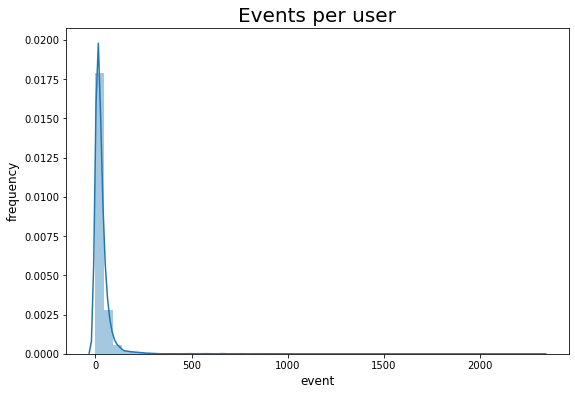

In [26]:
fig,ax=plt.subplots(figsize=(9,6))
sns.distplot(data.groupby('uid').agg({'event':'count'}).reset_index().event)
ax.set_title('Events per user' , fontsize=20)
ax.set_xlabel('event',fontsize=12)
ax.set_ylabel('frequency',fontsize=12)
plt.show() ;

In [27]:
data.groupby('uid').agg({'event':'count'}).reset_index().event.mode()[0]

5

In [28]:
data.groupby('uid')['event'].nunique().reset_index()['event'].value_counts()

4    3035
1    2707
2    1021
5     471
3     317
Name: event, dtype: int64

 - **What period of time does the data cover?**

In [29]:
data.date.min()

Timestamp('2019-07-25 00:00:00')

In [30]:
data.date.max()

Timestamp('2019-08-07 00:00:00')

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243713 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   event   243713 non-null  object        
 1   uid     243713 non-null  int64         
 2   time    243713 non-null  datetime64[ns]
 3   expid   243713 non-null  int64         
 4   date    243713 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 11.2+ MB


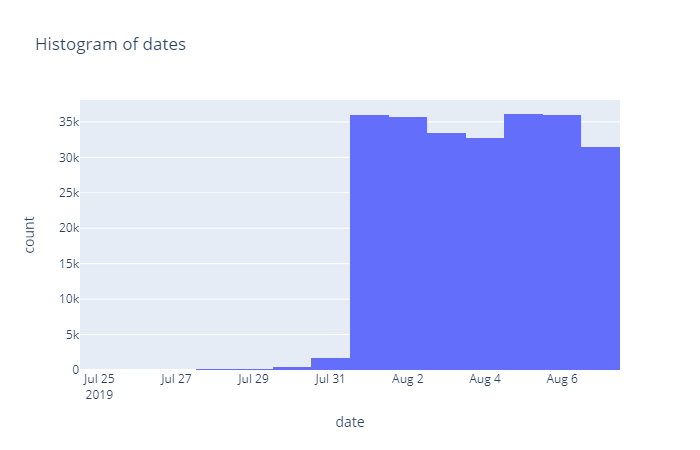

In [32]:
fig= px.histogram(data, x="date", title='Histogram of dates')
fig.show("png")

<font color ='blue'>

Older events could end up in some users' logs for technical reasons, and this could skew the overall picture. So on 1.Aug the data starts to be complete and we can ignore the earlier sections.    

In [33]:
new_data=data.query('date >"2019-07-31"')

In [34]:
new_data.sample(5)

,event,uid,time,expid,date
115433,OffersScreenAppear,6914750135397878804,2019-08-04 10:55:13,248,2019-08-04
24045,CartScreenAppear,1857022941517449964,2019-08-01 16:29:14,246,2019-08-01
177963,OffersScreenAppear,2377873061110757618,2019-08-06 05:04:27,246,2019-08-06
222961,Tutorial,3980825915805890698,2019-08-07 11:58:27,246,2019-08-07
219434,MainScreenAppear,1615677818169862243,2019-08-07 10:00:18,247,2019-08-07


- **Did you lose many events and users when excluding the older data?**

In [35]:
len(data.query('date <="2019-07-31"'))/len(data)

0.009900990099009901

In [36]:
data.query('date <="2019-07-31"').uid.nunique()/data.uid.nunique()

0.1839491458085022

In [37]:
new_data.uid.nunique()/data.uid.nunique()

0.9982783737253343

<font color ='blue'>
    
By excluding the older data, we lose less than 1% from events.<br> We still have 99% of the users in the new data. So we didn't lose much.  

 - **Make sure you have users from all three experimental groups and not users which are in both groups.**

In [38]:
new_data.groupby('expid').agg({'uid':'nunique'})

,uid
expid,
246,2484
247,2517
248,2537


In [39]:
new_data.head(1)

,event,uid,time,expid,date
2415,MainScreenAppear,3957232200565023322,2019-08-01 00:00:12,246,2019-08-01


In [40]:
new_data_grouped=new_data.groupby('uid').agg({'expid':"nunique"}).reset_index()

In [41]:
len(new_data_grouped[new_data_grouped['expid']==2])

0

## Conclusion

<font color ='blue'>
    
 - There are 243713 events and 7551 users in the logs.
 - The average number of events per user is 5.
 - We noticed that there is a technical problem in logs before 1.Aug. So we ignore the earlier sections.
 - By excluding the older data, we lose less than 1% from events. We still have 99% of the users in the new data. So we didn't lose much.    

<a id="funnel"></a>
## Step 4. Study the event funnel

- **See what events are in the logs and their frequency of occurrence. Sort them by frequency.**

In [42]:
new_data.event.value_counts()

MainScreenAppear           117617
OffersScreenAppear          46420
CartScreenAppear            42322
PaymentScreenSuccessful     33935
Tutorial                     1006
Name: event, dtype: int64

 - **Find the number of users who performed each of these actions.** 
 - **Sort the events by the number of users.** 
 - **Calculate the proportion of users who performed the action at least once.**

In [43]:
new_data_grupped=new_data.groupby('event').agg({'uid':'nunique'}).reset_index().sort_values('uid', ascending=False)
new_data_grupped

,event,uid
1,MainScreenAppear,7423
2,OffersScreenAppear,4595
0,CartScreenAppear,3735
3,PaymentScreenSuccessful,3539
4,Tutorial,841


In [44]:
new_data_grupped['total conversion']=new_data_grupped.uid/new_data.uid.nunique()

In [45]:
new_data_grupped

,event,uid,total conversion
1,MainScreenAppear,7423,0.984744
2,OffersScreenAppear,4595,0.609578
0,CartScreenAppear,3735,0.495490
3,PaymentScreenSuccessful,3539,0.469488
4,Tutorial,841,0.111568


 - **In what order do you think the actions took place. Are all of them part of a single sequence? You don't need to take them into account when calculating the funnel.**

In [46]:
new_data_grupped=new_data_grupped.query('event != "Tutorial"')
new_data_grupped

,event,uid,total conversion
1,MainScreenAppear,7423,0.984744
2,OffersScreenAppear,4595,0.609578
0,CartScreenAppear,3735,0.495490
3,PaymentScreenSuccessful,3539,0.469488


In [47]:
new_data_grupped['conversion to the next stage']=new_data_grupped['uid']/new_data_grupped['uid'].shift(+1)
new_data_grupped.loc[1,'conversion to the next stage']=1

In [48]:
new_data_grupped['perc_ch']=new_data_grupped['uid'].pct_change()

In [49]:
new_data_grupped

,event,uid,total conversion,conversion to the next stage,perc_ch
1,MainScreenAppear,7423,0.984744,1.000000,NaN
2,OffersScreenAppear,4595,0.609578,0.619022,-0.380978
0,CartScreenAppear,3735,0.495490,0.812840,-0.187160
3,PaymentScreenSuccessful,3539,0.469488,0.947523,-0.052477


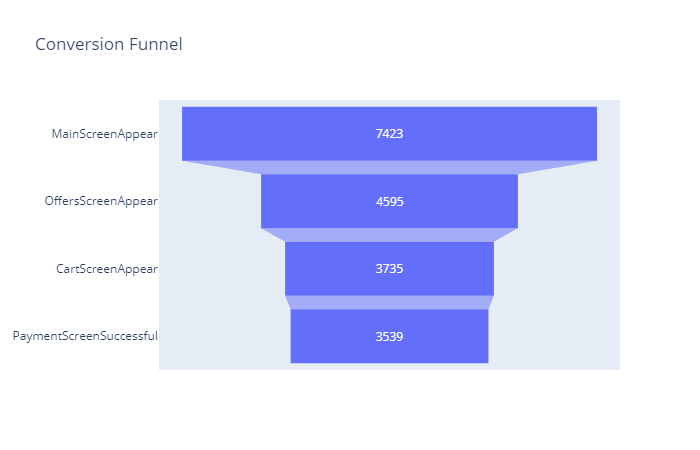

In [50]:
fig=go.Figure(go.Funnel(x=new_data_grupped.uid , y=new_data_grupped.event))
fig.update_layout(title="Conversion Funnel")
fig.show("png")

## Conclosion

<font color ='blue'>
    
At stage 'OffersScreenAppear' we lose the most users(40%). <br>
60% of users who come to the main page also go to the order page.  <br>  
46% of users make the entire journey from their first event to payment.  

<a id="experiment"></a>
## Step 5. Study the results of the experiment

- **How many users are there in each group?**

In [51]:
Dictionary = {246:'con1', 247:'con2', 248:'test'}
new_data['expid']=new_data['expid'].map(Dictionary )

In [52]:
new_data.groupby('expid').agg({'uid':'nunique'})

,uid
expid,
con1,2484
con2,2517
test,2537


 - **See if there is a statistically significant difference between samples 246 and 247.**

In [53]:
pivot = new_data.pivot_table(index='event', values='uid', columns='expid', aggfunc=lambda x: x.nunique()).reset_index().sort_values('con1', ascending=False)
pivot

expid,event,con1,con2,test
1,MainScreenAppear,2450,2479,2494
2,OffersScreenAppear,1542,1522,1531
0,CartScreenAppear,1266,1239,1230
3,PaymentScreenSuccessful,1200,1158,1181
4,Tutorial,278,283,280


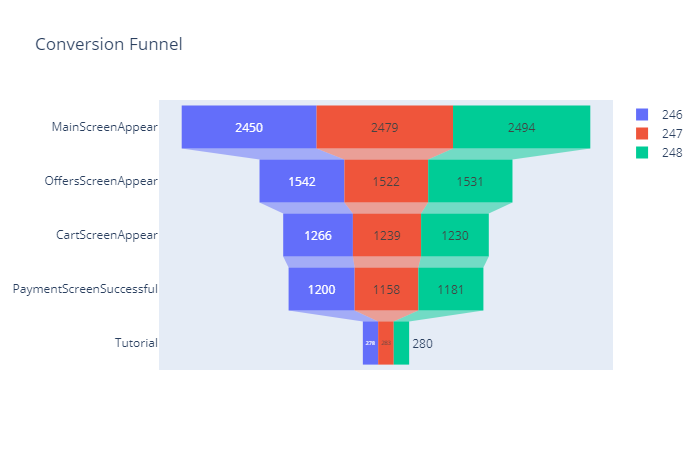

In [54]:
fig = go.Figure()
fig.add_trace(go.Funnel(x=pivot['con1'], y=pivot.event, name = '246'))
fig.add_trace(go.Funnel(x=pivot['con2'], y=pivot.event, name = '247'))
fig.add_trace(go.Funnel(x=pivot['test'], y=pivot.event, name = '248'))
fig.update_layout( title="Conversion Funnel")
fig.show("png")

In [55]:
def check_hypothesis(group1,group2, event, alpha=0.05):
    #let's start with successes, using 
    successes1=pivot[pivot.event==event][group1].iloc[0]
    successes2=pivot[pivot.event==event][group2].iloc[0]
    
    #for trials we can go back to original df or used a pre-aggregated data
    trials1=new_data[new_data.expid==group1]['uid'].nunique()
    trials2=new_data[new_data.expid==group2]['uid'].nunique()
    
    #proportion for success in the first group
    p1 = successes1/trials1

   #proportion for success in the second group
    p2 = successes2/trials2

    # proportion in a combined dataset
    p_combined = (successes1 + successes2) / (trials1 + trials2)

  
    difference = p1 - p2
    
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

  
    distr = stats.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject H0 for",event, 'and groups',group1,group2)
    else:
        print("Fail to Reject H0 for", event,'and groups',group1,group2)  

<font color ='blue'>

A/A Test: Hypotheses for difference between samples 246 and 247
    
H0: There isn't a statistically significant difference between samples 246 and 247 for CartScreenAppear.<br>
H1: There is a statistically significant difference between samples 246 and 247 for CartScreenAppear.

H0: There isn't a statistically significant difference between samples 246 and 247 for for MainScreenAppear.<br>
H1: There is a statistically significant difference between samples 246 and 247 for for MainScreenAppear.

H0: There isn't a statistically significant difference between samples 246 and 247 for OffersScreenAppear.<br>
H1: There is a statistically significant difference between samples 246 and 247 for OffersScreenAppear.

H0: There isn't a statistically significant difference between samples 246 and 247 for PaymentScreenSuccessful.<br>
H1: There is a statistically significant difference between samples 246 and 247 for PaymentScreenSuccessful.

H0: There isn't a statistically significant difference between samples 246 and 247 for Tutorial.<br>
H1: There is a statistically significant difference between samples 246 and 247 for Tutorial.

In [56]:
for i in pivot.event.unique():
    check_hypothesis('con1','con2', i, alpha=0.05)

p-value:  0.6756217702005545
Fail to Reject H0 for MainScreenAppear and groups con1 con2
p-value:  0.24301271796804658
Fail to Reject H0 for OffersScreenAppear and groups con1 con2
p-value:  0.2182812140633792
Fail to Reject H0 for CartScreenAppear and groups con1 con2
p-value:  0.10298394982948822
Fail to Reject H0 for PaymentScreenSuccessful and groups con1 con2
p-value:  0.9536145439962604
Fail to Reject H0 for Tutorial and groups con1 con2


<font color ='blue'>
    
A/B Test: Hypotheses for difference between samples 246 and 248
    
H0: There isn't a statistically significant difference between samples 246 and 248 for CartScreenAppear.  <br> 
H1: There is a statistically significant difference between samples 246 and 248 for CartScreenAppear.
    
H0: There isn't a statistically significant difference between samples 246 and 248 for for MainScreenAppear.  <br>  H1: There is a statistically significant difference between samples 246 and 248 for for MainScreenAppear.
    
H0: There isn't a statistically significant difference between samples 246 and 248 for OffersScreenAppear.   <br> 
H1: There is a statistically significant difference between samples 246 and 248 for OffersScreenAppear.
    
H0: There isn't a statistically significant difference between samples 246 and 248 for PaymentScreenSuccessful.  <br> 
H1: There is a statistically significant difference between samples 246 and 248 for PaymentScreenSuccessful.    
    
H0: There isn't a statistically significant difference between samples 246 and 248 for Tutorial. <br> 
H1: There is a statistically significant difference between samples 246 and 248 for Tutorial.

In [57]:
for i in pivot.event.unique():
    check_hypothesis('con1','test', i, alpha=0.05)

p-value:  0.34705881021236484
Fail to Reject H0 for MainScreenAppear and groups con1 test
p-value:  0.20836205402738917
Fail to Reject H0 for OffersScreenAppear and groups con1 test
p-value:  0.07842923237520116
Fail to Reject H0 for CartScreenAppear and groups con1 test
p-value:  0.2122553275697796
Fail to Reject H0 for PaymentScreenSuccessful and groups con1 test
p-value:  0.861330427953267
Fail to Reject H0 for Tutorial and groups con1 test


<font color ='blue'>

H0 wouldn't be rejected at any stage. There aren't statistically significant difference between samples group 246 and 248.     

<font color ='blue'>
A/B Test: Hypotheses for difference between samples 247 and 248:
    
H0: There isn't a statistically significant difference between samples 247 and 248 for CartScreenAppear.   
H1: There is a statistically significant difference between samples 247 and 248 for CartScreenAppear.
    
H0: There isn't a statistically significant difference between samples 247 and 248 for for MainScreenAppear.    
H1: There is a statistically significant difference between samples 247 and 248 for for MainScreenAppear.
    
H0: There isn't a statistically significant difference between samples 247 and 248 for OffersScreenAppear.    
H1: There is a statistically significant difference between samples 247 and 248 for OffersScreenAppear.
    
H0: There isn't a statistically significant difference between samples 247 and 248 for PaymentScreenSuccessful.   
H1: There is a statistically significant difference between samples 247 and 248 for PaymentScreenSuccessful.    
    
H0: There isn't a statistically significant difference between samples 247 and 248 for Tutorial.   
H1: There is a statistically significant difference between samples 247 and 248 for Tutorial.

In [58]:
for i in pivot.event.unique():
    check_hypothesis('con2','test', i, alpha=0.05)

p-value:  0.6001661582453706
Fail to Reject H0 for MainScreenAppear and groups con2 test
p-value:  0.9293730042460788
Fail to Reject H0 for OffersScreenAppear and groups con2 test
p-value:  0.5973544899382834
Fail to Reject H0 for CartScreenAppear and groups con2 test
p-value:  0.6982134522789267
Fail to Reject H0 for PaymentScreenSuccessful and groups con2 test
p-value:  0.8151898803603024
Fail to Reject H0 for Tutorial and groups con2 test


<font color ='blue'>

H0 wouldn't be rejected at any stage. There aren't statistically significant difference between samples group 247 and 248.     

In [59]:
Dic={'con1':'con1', 'con2':'con1', 'test':'test'}
new_data['expid2']=new_data['expid'].map(Dic)

In [60]:
new_data.groupby('expid2').agg({'uid':'nunique'})

,uid
expid2,
con1,5001
test,2537


In [61]:
new_data.head()

,event,uid,time,expid,date,expid2
2415,MainScreenAppear,3957232200565023322,2019-08-01 00:00:12,con1,2019-08-01,con1
2416,OffersScreenAppear,3957232200565023322,2019-08-01 00:00:17,con1,2019-08-01,con1
2417,MainScreenAppear,4933689529142781210,2019-08-01 00:00:29,con1,2019-08-01,con1
2418,MainScreenAppear,1802682376349807053,2019-08-01 00:00:33,test,2019-08-01,test
2419,MainScreenAppear,2011152258955517776,2019-08-01 00:00:42,con2,2019-08-01,con1


In [62]:
pivot2=new_data.pivot_table(index='event', values='uid', columns='expid2', aggfunc='nunique').reset_index().sort_values('con1', ascending=False)
pivot2

expid2,event,con1,test
1,MainScreenAppear,4929,2494
2,OffersScreenAppear,3064,1531
0,CartScreenAppear,2505,1230
3,PaymentScreenSuccessful,2358,1181
4,Tutorial,561,280


In [63]:
def check_hypothesis2(group1,group2, event, alpha=0.05):
    #let's start with successes, using 
    successes1=pivot2[pivot2.event==event][group1].iloc[0]
    successes2=pivot2[pivot2.event==event][group2].iloc[0]
    
    #for trials we can go back to original df or used a pre-aggregated data
    trials1=new_data[new_data.expid2==group1]['uid'].nunique()
    trials2=new_data[new_data.expid2==group2]['uid'].nunique()
    
    #proportion for success in the first group
    p1 = successes1/trials1

   #proportion for success in the second group
    p2 = successes2/trials2

    # proportion in a combined dataset
    p_combined = (successes1 + successes2) / (trials1 + trials2)

  
    difference = p1 - p2
    
    
    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

  
    distr = stats.norm(0, 1) 


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject H0 for",event, 'and groups',group1,group2)
    else:
        print("Fail to Reject H0 for", event,'and groups',group1,group2)  

<font color ='blue'>
A/B Test: Hypotheses for difference between samples 246-247(combined) and 248:
    
H0: There isn't a statistically significant difference between samples 246-247(combined) and 248 for CartScreenAppear.   
H1: There is a statistically significant difference between samples 246-247(combined) and 248 for CartScreenAppear.
    
H0: There isn't a statistically significant difference between samples 246-247(combined) and 248 for for MainScreenAppear.    
H1: There is a statistically significant difference between samples 246-247(combined) and 248 for for MainScreenAppear.
    
H0: There isn't a statistically significant difference between samples 246-247(combined) and 248 for OffersScreenAppear.    
H1: There is a statistically significant difference between samples 246-247(combined) and 248 for OffersScreenAppear.
    
H0: There isn't a statistically significant difference between samples 246-247(combined) and 248 for PaymentScreenSuccessful.   
H1: There is a statistically significant difference between samples 246-247(combined) and 248 for PaymentScreenSuccessful.    
    
H0: There isn't a statistically significant difference between samples 246-247(combined) and 248 for Tutorial.   
H1: There is a statistically significant difference between samples 246-247(combined) and 248 for Tutorial.

In [64]:
for i in pivot2.event.unique():
    check_hypothesis2('con1','test' ,i, alpha=0.05)

p-value:  0.39298914928006035
Fail to Reject H0 for MainScreenAppear and groups con1 test
p-value:  0.4386768167991866
Fail to Reject H0 for OffersScreenAppear and groups con1 test
p-value:  0.18714829717090664
Fail to Reject H0 for CartScreenAppear and groups con1 test
p-value:  0.6221237660987535
Fail to Reject H0 for PaymentScreenSuccessful and groups con1 test
p-value:  0.813440015718357
Fail to Reject H0 for Tutorial and groups con1 test


<font color ='blue'>
    
H0 wouldn't be rejected at any stage. There aren't statistically significant difference between samples group 246-247(combined) and 248. 

<font color ='blue'>
    
We made 10 Hypotheses for the A/B tests. We have to correct the significance level by Bonferroni procedure and the significance level of each test will be 0.05 / 10 = 0.005. We run through the previous steps again.   

In [65]:
alpha=0.05/10

In [66]:
for i in pivot.event.unique():
    check_hypothesis('con1','test', i, alpha=0.005)

p-value:  0.34705881021236484
Fail to Reject H0 for MainScreenAppear and groups con1 test
p-value:  0.20836205402738917
Fail to Reject H0 for OffersScreenAppear and groups con1 test
p-value:  0.07842923237520116
Fail to Reject H0 for CartScreenAppear and groups con1 test
p-value:  0.2122553275697796
Fail to Reject H0 for PaymentScreenSuccessful and groups con1 test
p-value:  0.861330427953267
Fail to Reject H0 for Tutorial and groups con1 test


<font color ='blue'>

H0 wouldn't be rejected at any stage. There aren't statistically significant difference between samples group 246 and 248.  

In [67]:
for i in pivot.event.unique():
    check_hypothesis('con2','test', i, alpha=0.005)

p-value:  0.6001661582453706
Fail to Reject H0 for MainScreenAppear and groups con2 test
p-value:  0.9293730042460788
Fail to Reject H0 for OffersScreenAppear and groups con2 test
p-value:  0.5973544899382834
Fail to Reject H0 for CartScreenAppear and groups con2 test
p-value:  0.6982134522789267
Fail to Reject H0 for PaymentScreenSuccessful and groups con2 test
p-value:  0.8151898803603024
Fail to Reject H0 for Tutorial and groups con2 test


<font color ='blue'>
    
H0 wouldn't be rejected at any stage. There aren't statistically significant difference between samples group 247 and 248.     

## step 6: Overall Conclusion

<font color="blue">
    
### [Goal](#goal)
    
Investigating user behavior for a food company's app.    
study the sales funnel and look at the results of an A/A/B test.(changing the fonts for the entire app)
    
    
### [Study the event funnel](#funnel)
  - At stage 'OffersScreenAppear' we lose the most users(40%). 
  - 60% of users who come to the main page also go to the order page.
  - 46% of users make the entire journey from their first event to payment. 

### [Study the results of the experiment](#experiment)
  - A/A tests: There aren't statistically significant difference between control groups (246,247)    at any stages.    
  - A/B test1: There aren't statistically significant difference between samples(246,248) at any stages.  
  - A/B test2: There aren't statistically significant difference between samples(247,248) at any stages. 
  - There aren't statistically significant difference between samples(246,258 and 247,248) at any stages also after correcting the alpha.
    
### Final Conclusion and Suggestions  
    
Changing the application's font did not cause a significant difference between the test group and the control groups. Therefore, the test is not successful and changing the font is not effective in the conversion. So it is not recommended. 